In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Dataset for Code Wars.csv')
data.head()

,Rank,Released,Movie,Worldwide\r\nBox Office,Domestic\r\nBox Office,International\r\nBox Office,Unnamed: 6
0,1.0,2009.0,Avatar,2.923706e+09,785221649.0,2.138484e+09,NaN
1,2.0,2019.0,Avengers: Endgame,2.794732e+09,858373000.0,1.936359e+09,NaN
2,3.0,2022.0,Avatar: The Way of Water,2.318553e+09,683875614.0,1.634677e+09,NaN
3,4.0,2018.0,Avengers: Infinity War,2.048360e+09,678815482.0,1.369544e+09,NaN
4,5.0,2021.0,Spider-Man: No Way Home,1.910048e+09,814115070.0,1.095933e+09,NaN


In [3]:
data.drop('Unnamed: 6',axis = 1 ,inplace = True)
data.head()

,Rank,Released,Movie,Worldwide\r\nBox Office,Domestic\r\nBox Office,International\r\nBox Office
0,1.0,2009.0,Avatar,2.923706e+09,785221649.0,2.138484e+09
1,2.0,2019.0,Avengers: Endgame,2.794732e+09,858373000.0,1.936359e+09
2,3.0,2022.0,Avatar: The Way of Water,2.318553e+09,683875614.0,1.634677e+09
3,4.0,2018.0,Avengers: Infinity War,2.048360e+09,678815482.0,1.369544e+09
4,5.0,2021.0,Spider-Man: No Way Home,1.910048e+09,814115070.0,1.095933e+09


In [5]:
data.shape

(2019, 6)

In [6]:
data.describe()

,Rank,Released,Worldwide\r\nBox Office,Domestic\r\nBox Office,International\r\nBox Office
count,2000.000000,2000.000000,2.000000e+03,1.280000e+03,1.618000e+03
mean,1000.500000,2008.151500,9.090613e+07,5.047839e+07,7.243506e+07
std,577.494589,13.263993,2.203275e+08,9.381809e+07,1.632780e+08
min,1.000000,1927.000000,6.141000e+04,4.930000e+02,7.200000e+01
25%,500.750000,2000.000000,1.334808e+06,1.392043e+06,7.802365e+05
50%,1000.500000,2014.000000,1.208407e+07,1.606231e+07,1.090943e+07
75%,1500.250000,2018.000000,7.501374e+07,5.348155e+07,7.246490e+07
max,2000.000000,2023.000000,2.923706e+09,8.583730e+08,2.138484e+09


### ---------------------------------->>> Data Pre-Processing <<<---------------------------------

In [10]:
data.isnull().sum()/len(data) * 100

Rank                            0.941060
Released                        0.941060
Movie                           0.941060
Worldwide\r\nBox Office         0.941060
Domestic\r\nBox Office         36.602278
International\r\nBox Office    19.861317
dtype: float64

In [13]:
data['International\r\nBox Office'].fillna(data['International\r\nBox Office'].mean(),inplace = True)
data.isnull().sum()

Rank                            19
Released                        19
Movie                           19
Worldwide\r\nBox Office         19
Domestic\r\nBox Office         739
International\r\nBox Office      0
dtype: int64

In [14]:
data['Domestic\r\nBox Office'].fillna(data['Domestic\r\nBox Office'].mean(),inplace = True)
data.isnull().sum()

Rank                           19
Released                       19
Movie                          19
Worldwide\r\nBox Office        19
Domestic\r\nBox Office          0
International\r\nBox Office     0
dtype: int64

In [18]:
data.dropna(inplace = True)
data.isnull().sum()

Rank                           0
Released                       0
Movie                          0
Worldwide\r\nBox Office        0
Domestic\r\nBox Office         0
International\r\nBox Office    0
dtype: int64

In [19]:
data['Overall_Collection'] = data["International\r\nBox Office"] + data['Domestic\r\nBox Office'] + data['Worldwide\r\nBox Office']
data.head()

,Rank,Released,Movie,Worldwide\r\nBox Office,Domestic\r\nBox Office,International\r\nBox Office,Overall_Collection
0,1.0,2009.0,Avatar,2.923706e+09,785221649.0,2.138484e+09,5.847412e+09
1,2.0,2019.0,Avengers: Endgame,2.794732e+09,858373000.0,1.936359e+09,5.589464e+09
2,3.0,2022.0,Avatar: The Way of Water,2.318553e+09,683875614.0,1.634677e+09,4.637105e+09
3,4.0,2018.0,Avengers: Infinity War,2.048360e+09,678815482.0,1.369544e+09,4.096720e+09
4,5.0,2021.0,Spider-Man: No Way Home,1.910048e+09,814115070.0,1.095933e+09,3.820096e+09


## -------------------------------------->>>> data visualization <<<< ---------------------------------

#### 1. Top 10 Growing Movie's

In [21]:
lar_10 = data.nlargest(10,"Overall_Collection")
lar_10[['Movie','Overall_Collection']]

,Movie,Overall_Collection
0,Avatar,5.847412e+09
1,Avengers: Endgame,5.589464e+09
2,Avatar: The Way of Water,4.637105e+09
3,Avengers: Infinity War,4.096720e+09
4,Spider-Man: No Way Home,3.820096e+09
5,Jurassic World,3.339927e+09
6,The Avengers,3.030200e+09
7,Furious 7,3.029107e+09
8,Top Gun: Maverick,2.962739e+09
9,Avengers: Age of Ultron,2.790634e+09


In [81]:
import plotly.express as px
fig = px.bar(lar_10 , x = 'Movie', y = 'Overall_Collection', color = 'Movie', title = 'TOP 10 GROWING MOVIE')
fig.show()

### 2. Lowest 10 Movie

In [29]:
low_10 = data.nsmallest(10 , "Overall_Collection")
low_10[['Movie','Overall_Collection']]

,Movie,Overall_Collection
2004,Azumi,132684.0
1985,Prisoners of the Ghostland,142912.0
1980,Sympathie pour le diable,150590.0
1968,Sky Blue,163328.0
1944,Sonchiriya,192112.0
1932,Kickboxer: Retaliation,203380.0
1904,Archenemy,245068.0
1885,Ism,277260.0
1883,Appurushîdo,283856.0
1868,Game,314070.0


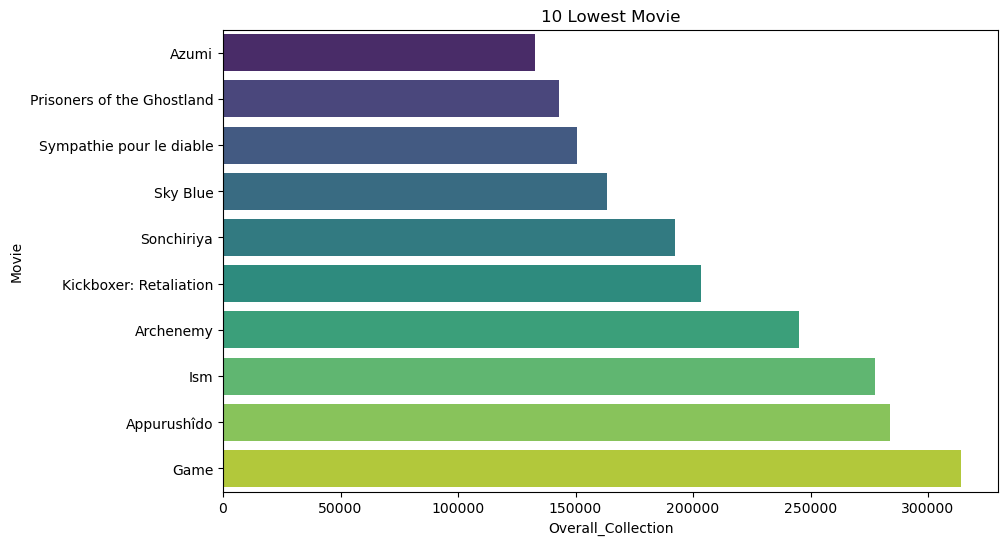

In [39]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Overall_Collection',y = 'Movie',data = low_10,palette = "viridis")
plt.title('10 Lowest Movie')
plt.show()

In [47]:
### Filter Data Frame 
filte_df = data[(data['Released'] >= 2012) & (data['Released']<= 2022)]
filte_df['Released'].unique()

array([2019., 2022., 2018., 2021., 2015., 2012., 2017., 2013., 2016.,
       2014., 2020.])

In [67]:
group_by = filte_df.groupby('Released').apply(lambda x :x.nlargest(10 , 'Overall_Collection')).reset_index(drop = True)
group_by = group_by[['Released','Overall_Collection' ,'Movie']]
group_by.sample(10)

,Released,Overall_Collection,Movie
52,2017.0,1.738176e+09,Guardians of the Galaxy Vol 2
86,2020.0,3.327205e+08,Wonder Woman 1984
77,2019.0,7.271278e+08,Shazam!
73,2019.0,1.521466e+09,Fast & Furious Presents: Hobbs & Shaw
46,2016.0,8.777996e+08,Warcraft
35,2015.0,1.037717e+09,Ant-Man
16,2013.0,8.220058e+08,Pacific Rim
106,2022.0,1.521856e+09,Thor: Love and Thunder
8,2012.0,3.207599e+08,Underworld: Awakening
54,2017.0,1.670948e+09,Zhan Lang 2


### 3.  Create A Seprate plot For Each Year

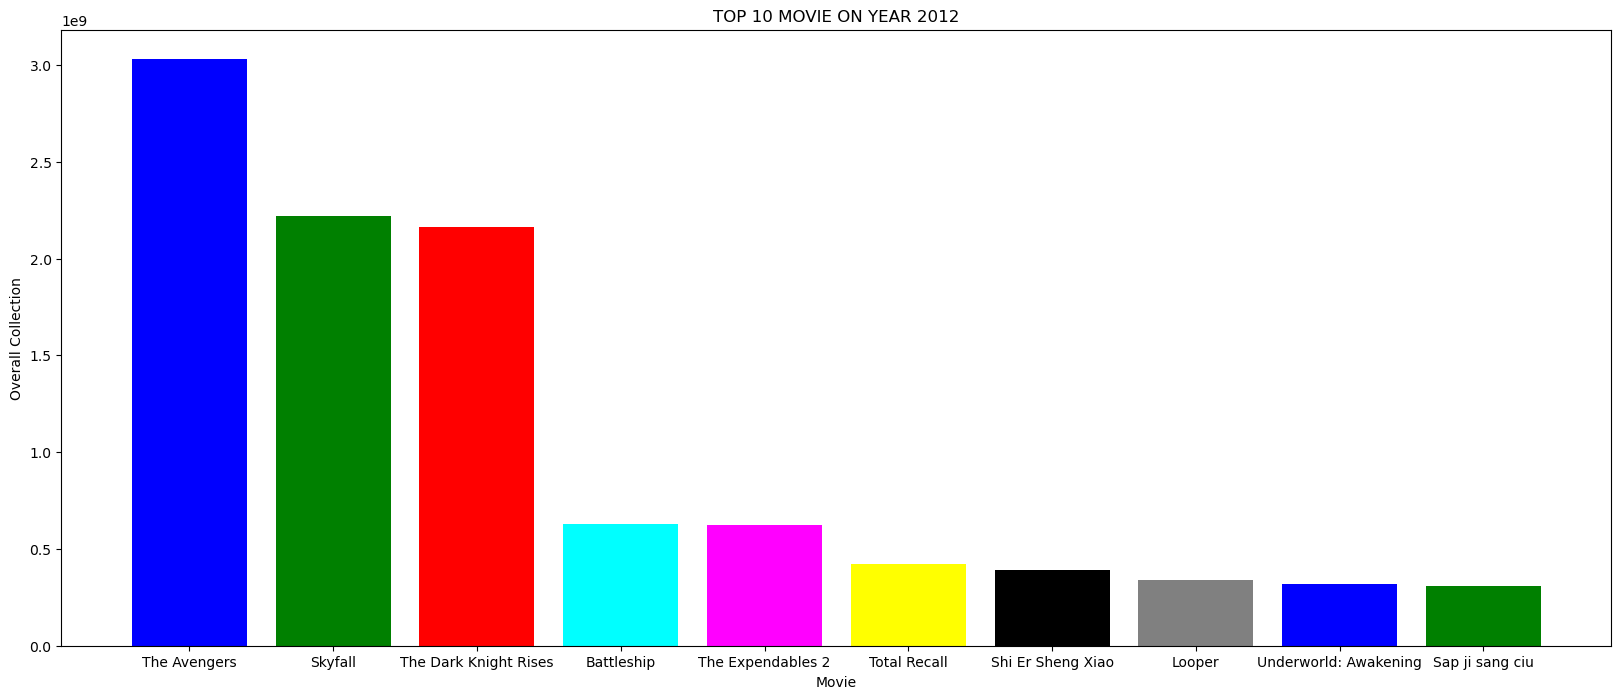

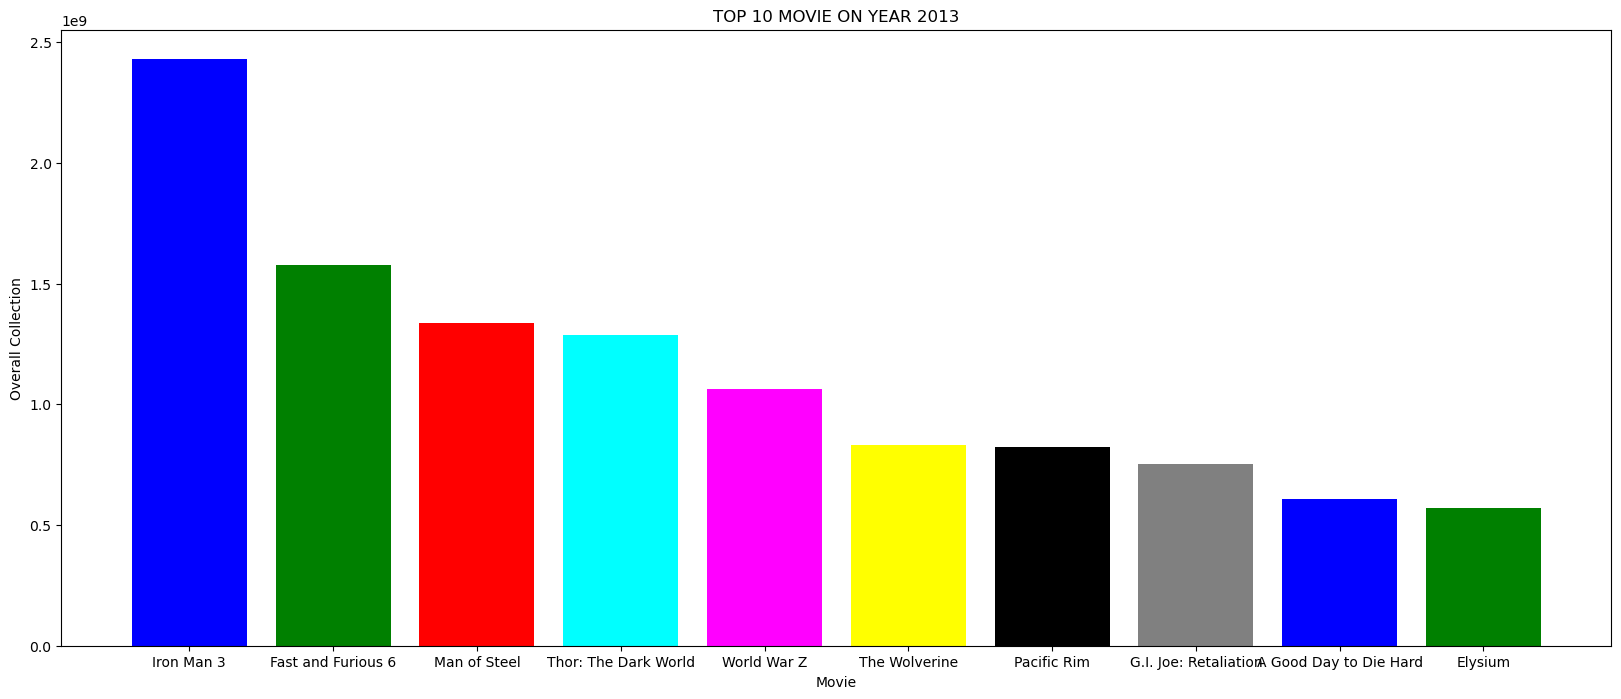

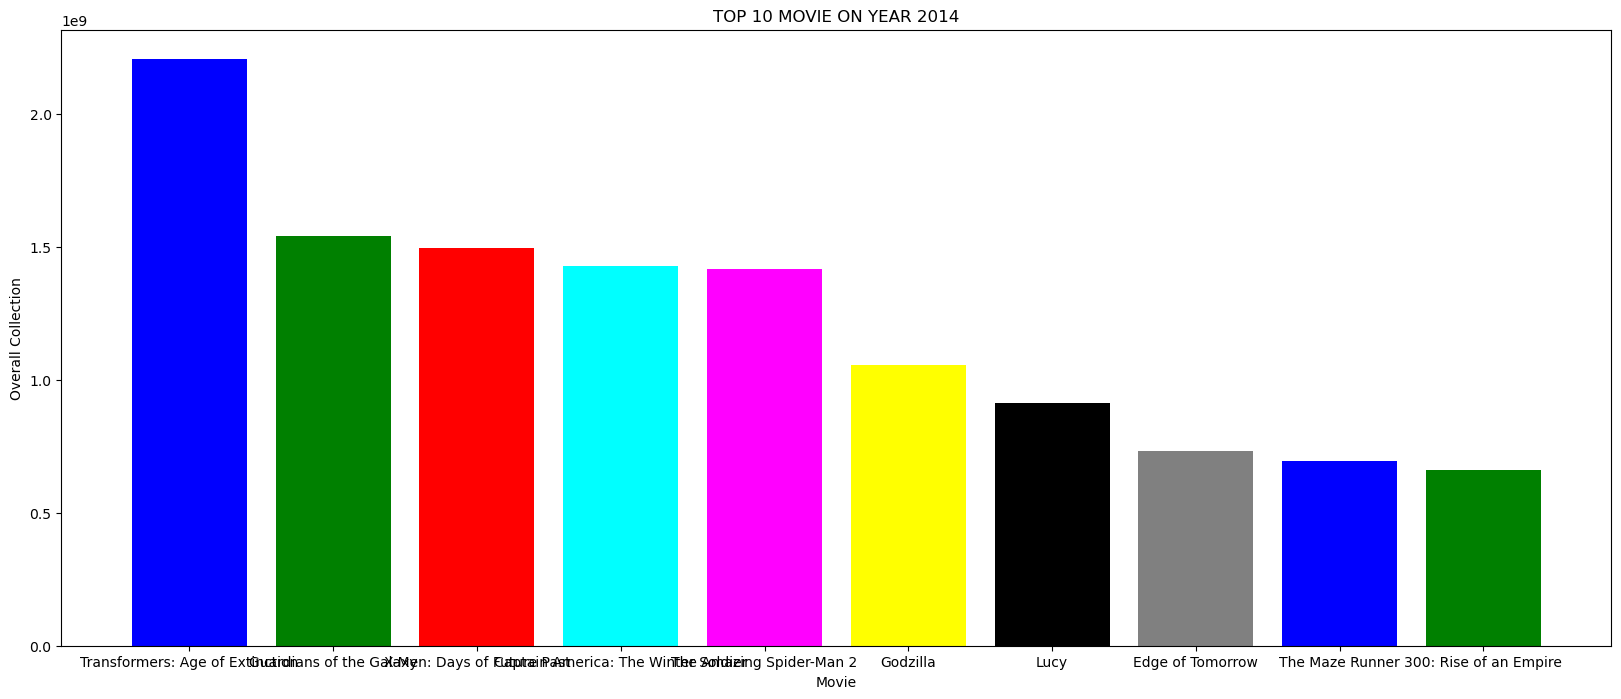

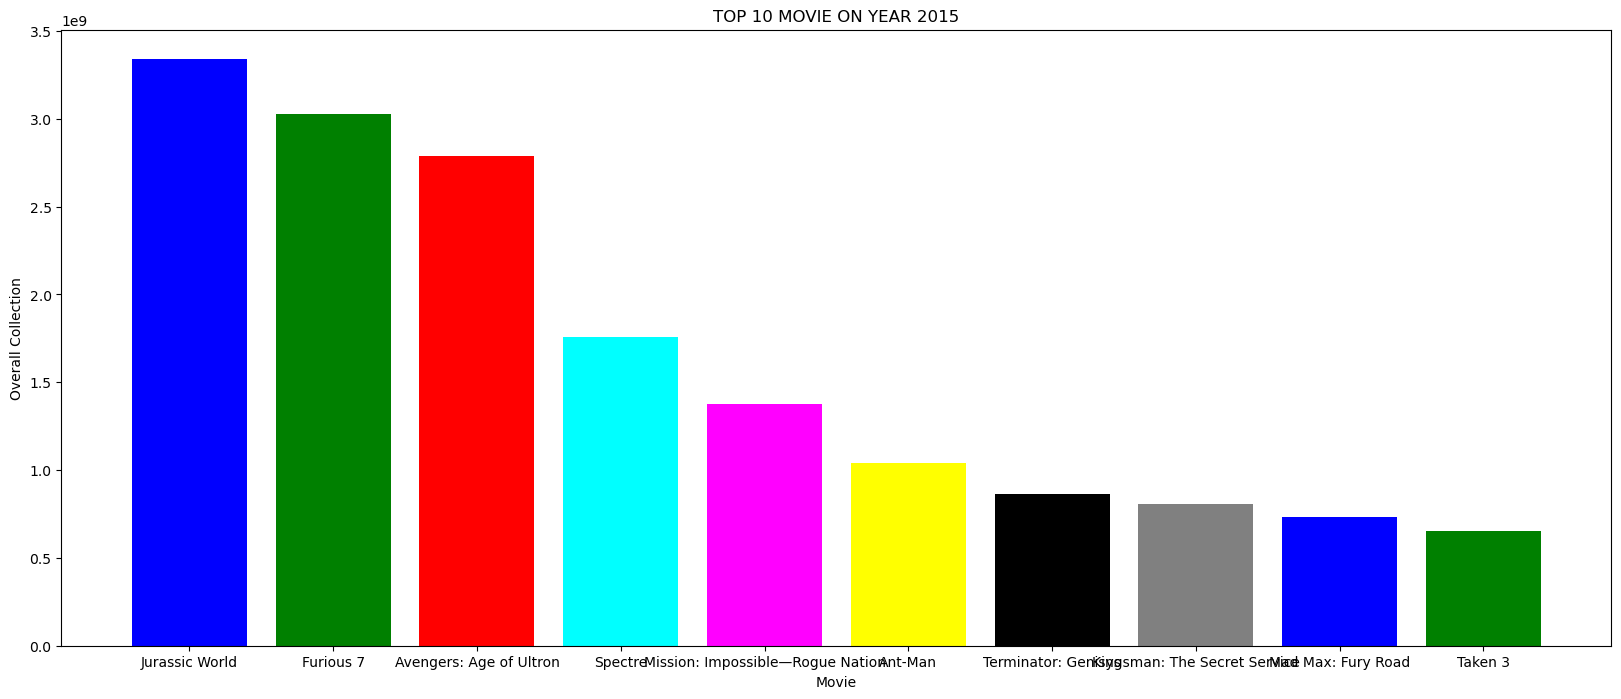

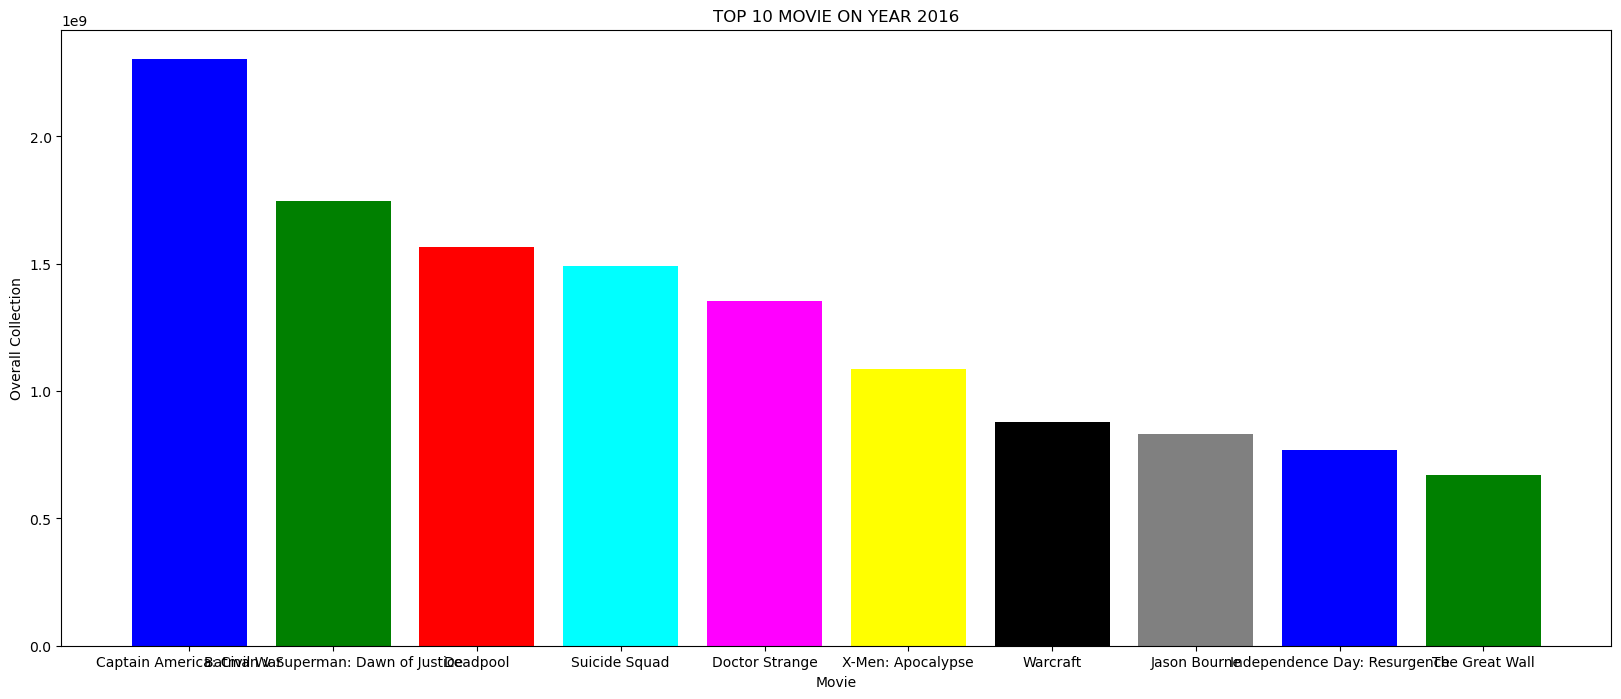

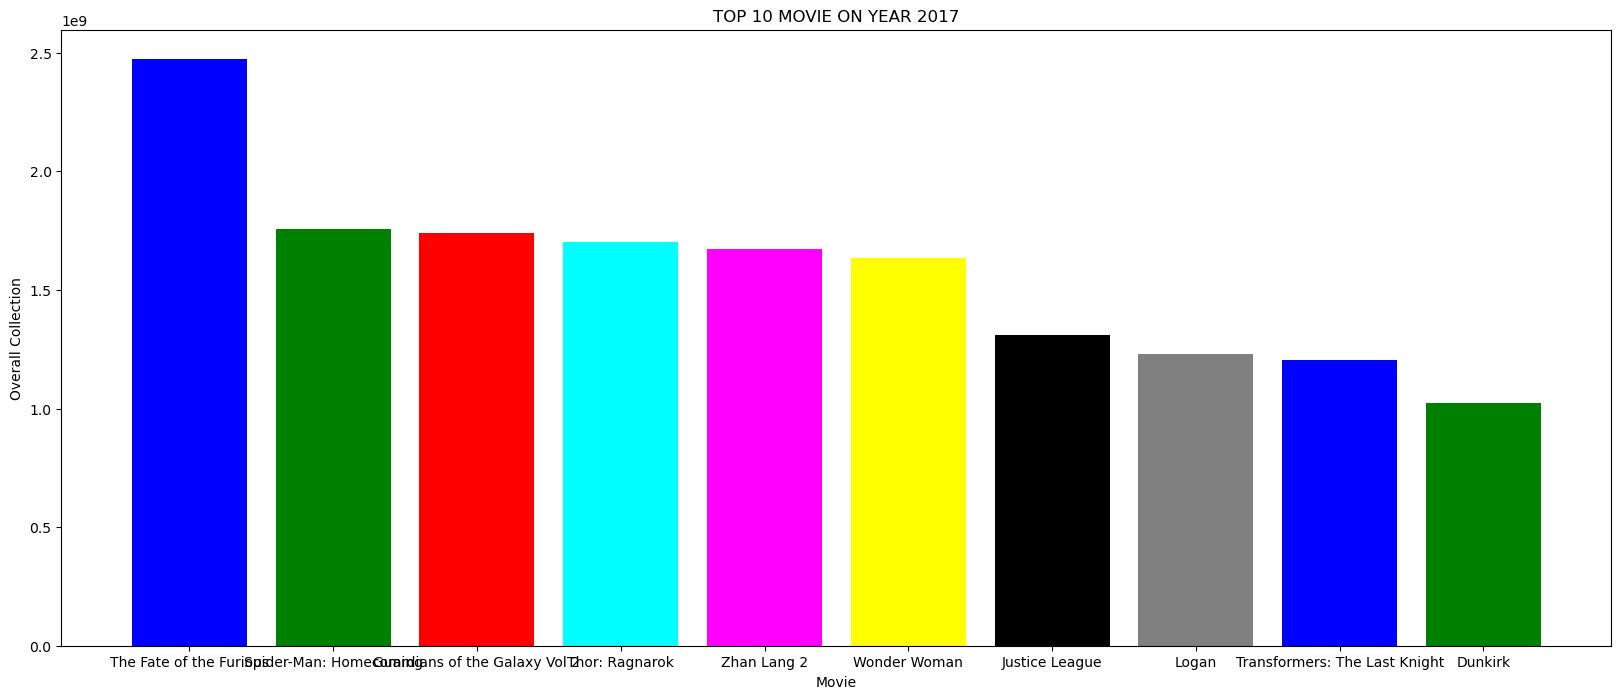

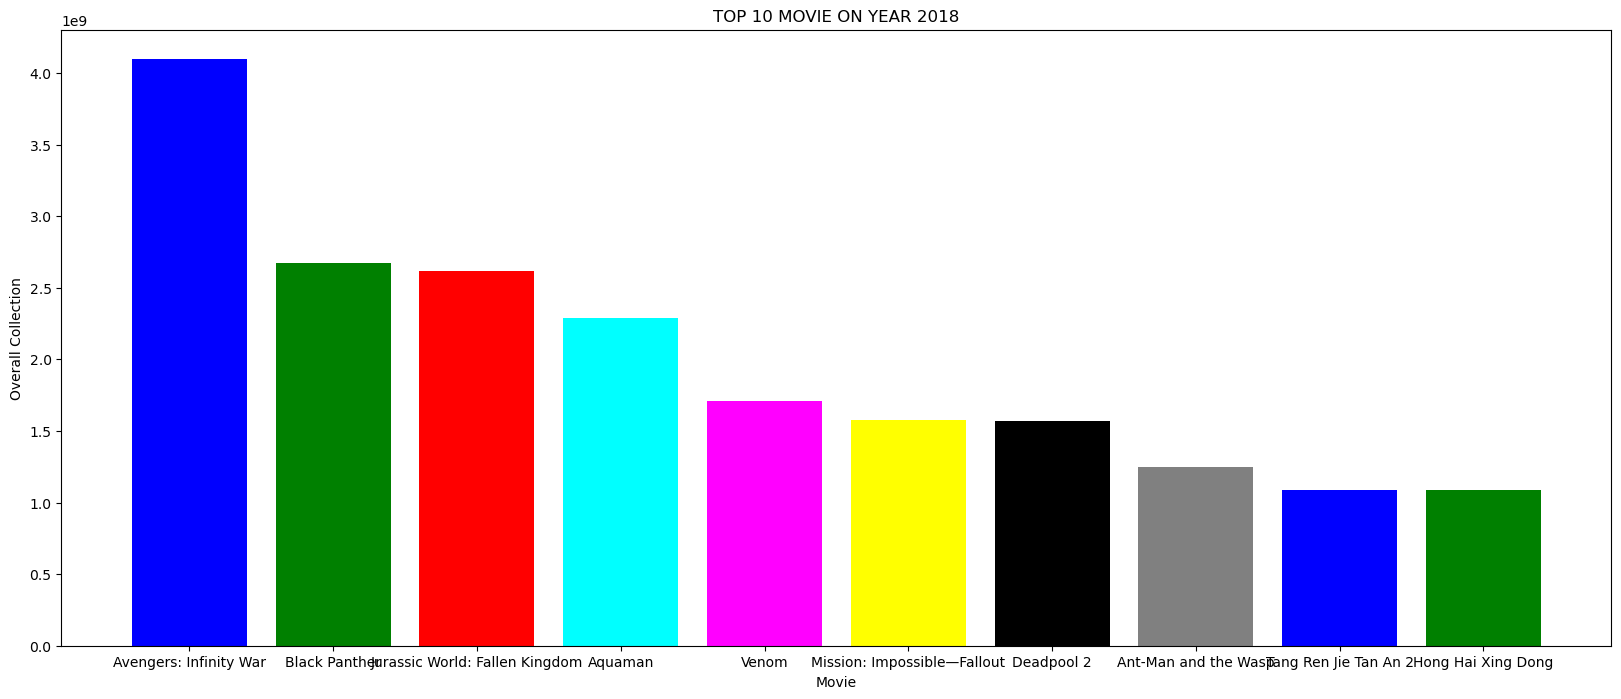

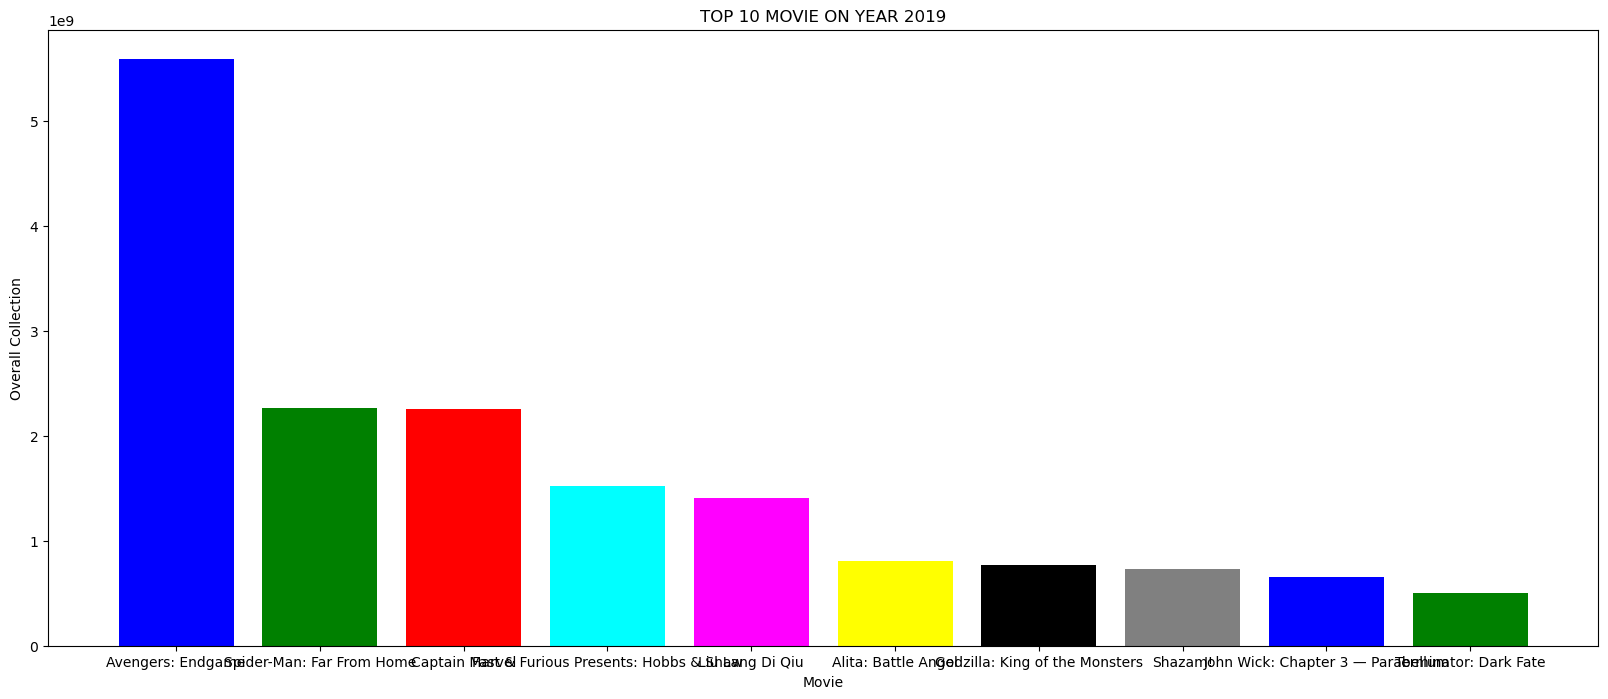

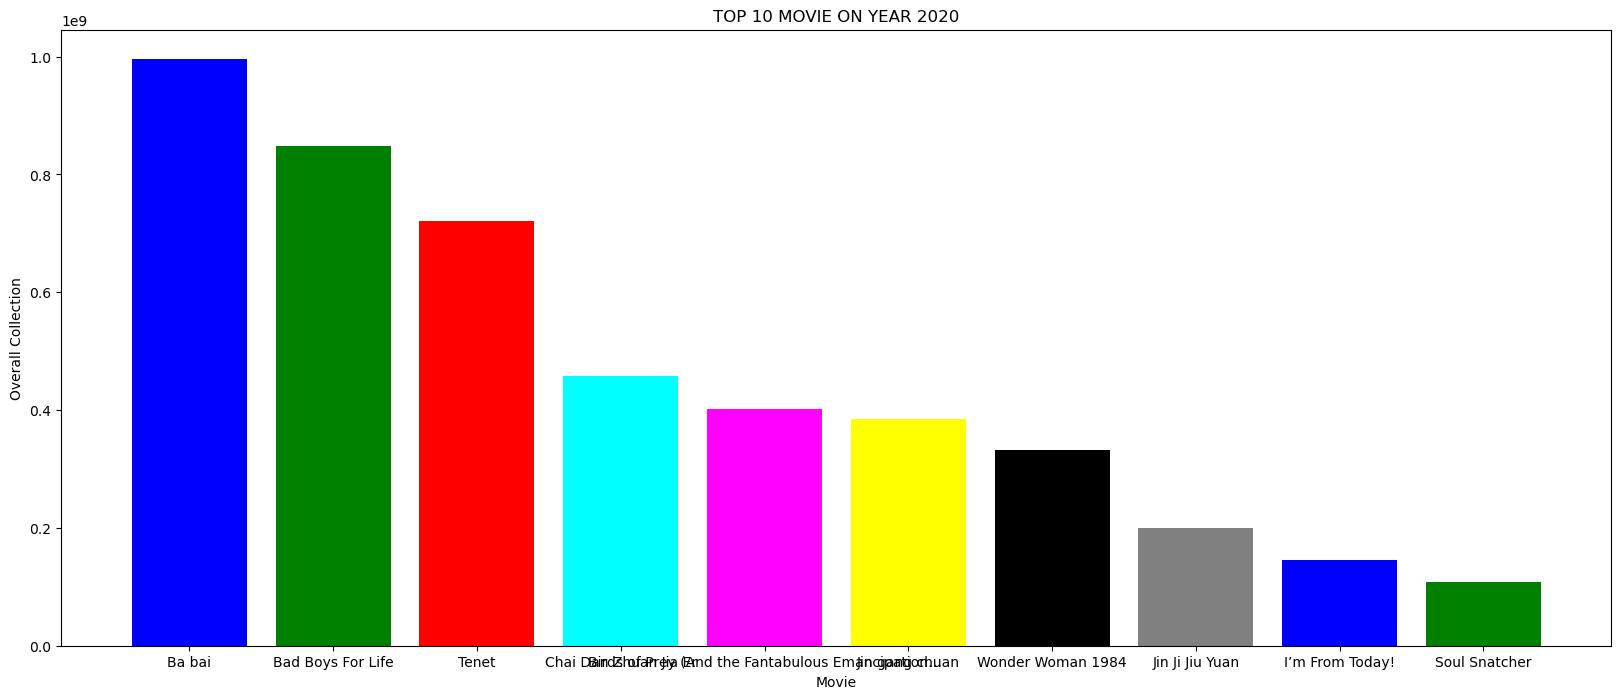

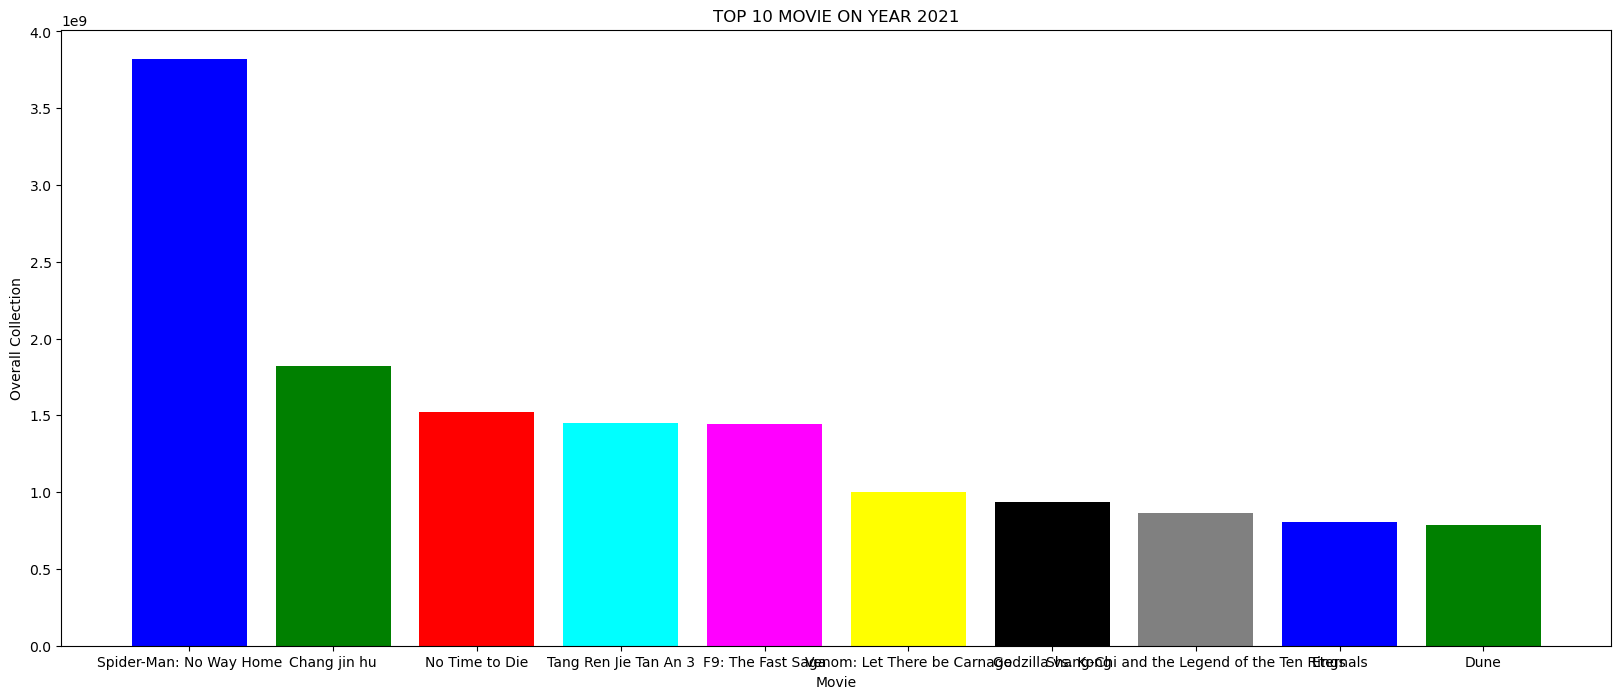

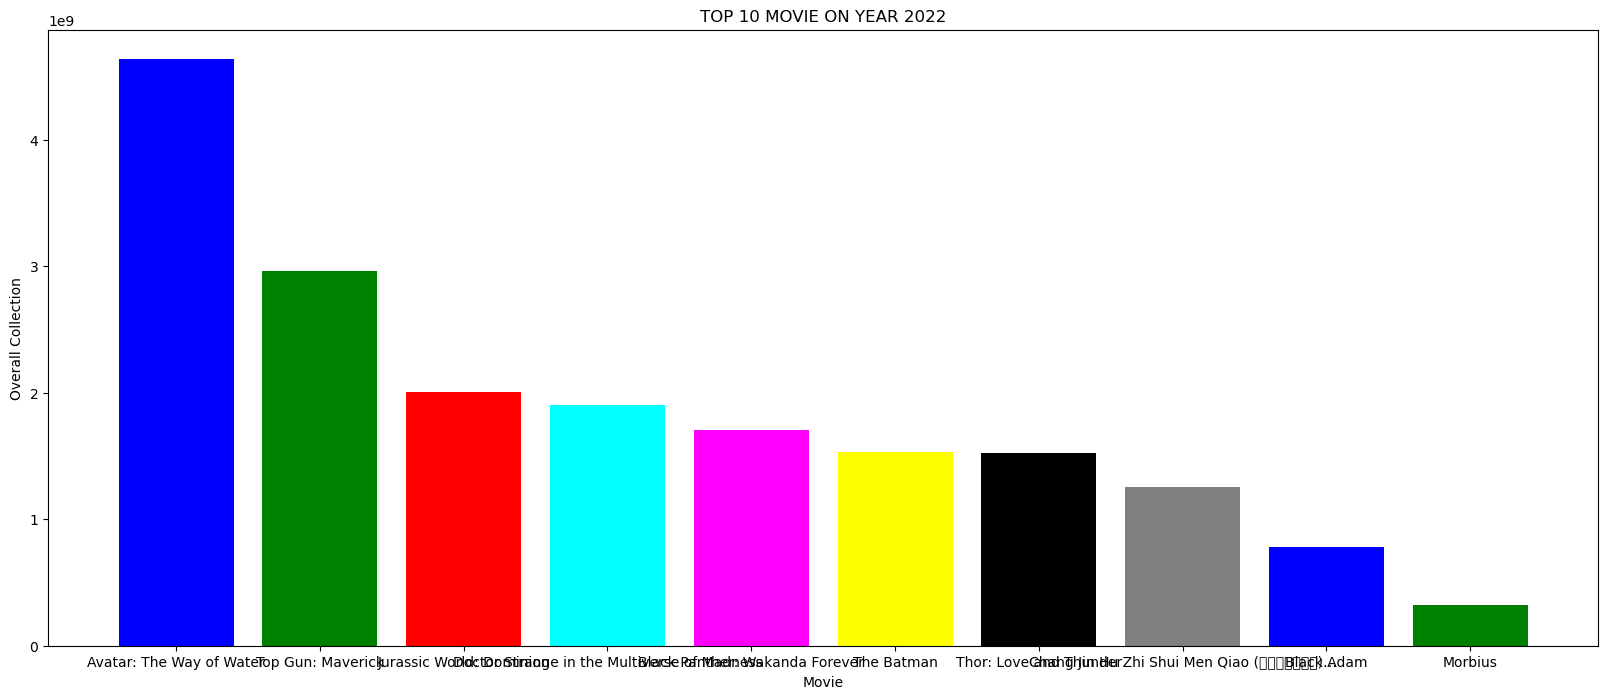

In [80]:
l  =   ['blue', 'green' , 'red' , 'cyan' , 'magenta' , 'yellow' , 'black' , 'grey']
for year, dta in group_by.groupby('Released'):
    plt.figure(figsize = (20,8))
    plt.bar(dta['Movie'] , dta['Overall_Collection'],color = l)  
    plt.xlabel('Movie')
    plt.ylabel('Overall Collection')
    plt.title(f'TOP 10 MOVIE ON YEAR {int(year)}')
    plt.show()